In [67]:
import h3
from shapely import wkt
# import urbanity as urb
import pandas as pd
import geopandas as gpd
from shapely.geometry import Polygon

In [68]:
output_filepath = r'e:\work\spatio_evo_urbanvisenv_svi\范围线\new_2024_03_25\urban_six_area.shp'
sg_gdf = gpd.read_file(output_filepath)
print(sg_gdf.geometry.values[0])
print(sg_gdf.geometry.values[0].__geo_interface__)

POLYGON ((91.01384630192808 29.630661806914325, 91.01312382460861 29.63034589035332, 91.01244933825161 29.630693858269513, 91.01249732628555 29.631357741824207, 91.0132198042752 29.63167365854703, 91.01389429356077 29.631325691553297, 91.01384630192808 29.630661806914325))
{'type': 'Polygon', 'coordinates': (((91.01384630192808, 29.630661806914325), (91.01312382460861, 29.63034589035332), (91.01244933825161, 29.630693858269513), (91.01249732628555, 29.631357741824207), (91.0132198042752, 29.63167365854703), (91.01389429356077, 29.631325691553297), (91.01384630192808, 29.630661806914325)),)}


In [69]:
import pandas as pd  
from sklearn.preprocessing import MinMaxScaler   
  
# 初始化MinMaxScaler  
scaler = MinMaxScaler(feature_range=(0, 1))
sg_gdf['assortativ'] = scaler.fit_transform(sg_gdf[['assortativ']])
sg_gdf


,hexid,assortativ,area_m2,geometry
0,8a3c72772727fff,0.037037,19764.780841,"POLYGON ((91.01385 29.63066, 91.01312 29.63035..."
1,8a3c7274b927fff,0.037037,19777.962373,"POLYGON ((91.16697 29.64801, 91.16625 29.64769..."
2,8a3c7274962ffff,0.000000,19779.646834,"POLYGON ((91.18620 29.65253, 91.18548 29.65222..."
3,8a3c72746c27fff,0.185185,19768.449836,"POLYGON ((91.05224 29.64873, 91.05152 29.64841..."
4,8a3c7274c64ffff,0.000000,19776.605813,"POLYGON ((91.14688 29.66046, 91.14615 29.66015..."
...,...,...,...,...
2997,8a3c7274454ffff,0.185185,19769.974608,"POLYGON ((91.06597 29.66436, 91.06525 29.66405..."
2998,8a3c72746927fff,0.000000,19768.893143,"POLYGON ((91.05498 29.65764, 91.05426 29.65732..."
2999,8a3c7274112ffff,0.000000,19773.679097,"POLYGON ((91.11069 29.66331, 91.10996 29.66300..."
3000,8a3c72741577fff,0.222222,19773.182625,"POLYGON ((91.10669 29.65643, 91.10596 29.65611..."


In [74]:
file_path1 = r'e:\work\spatio_evo_urbanvisenv_svi\sv\indicator_matrix_normalization.csv'
df1 = pd.read_csv(file_path1)
df1.head()
split_data = df1.iloc[:,0].str.split('_',expand=True)
split_data.columns=['OBJECTID_1','lng','lat','data','degree_1']

for i in range(split_data.shape[1]):  
    df1[split_data.columns[i]] = split_data[split_data.columns[i]]  

split_data = df1['degree_1'].str.split('.',expand=True)
df1['degree'] = split_data[split_data.columns[0]]  

df1.head()
df1

,id,Sum_sky,Sum_plant,Sum_building,Sum_road,beautiful,boring,depressing,lively,safety,wealthy,OBJECTID_1,lng,lat,data,degree_1,degree
0,10000_91.03441834_29.63851099_201608_0.jpg,0.530283,0.000000,0.098843,0.633720,0.619445,0.507249,0.062276,0.996140,0.964733,0.532009,10000,91.03441834,29.63851099,201608,0.jpg,0
1,10000_91.03441834_29.63851099_201608_180.jpg,0.116461,0.000106,0.141364,0.525176,0.560076,0.263364,0.390571,0.995138,0.897178,0.610086,10000,91.03441834,29.63851099,201608,180.jpg,180
2,10000_91.03441834_29.63851099_201608_270.jpg,0.454458,0.001586,0.083704,0.567873,0.499536,0.458934,0.144668,0.988514,0.962822,0.542383,10000,91.03441834,29.63851099,201608,270.jpg,270
3,10000_91.03441834_29.63851099_201608_90.jpg,0.352806,0.000000,0.083109,0.587028,0.578800,0.445184,0.193289,0.991334,0.954227,0.498258,10000,91.03441834,29.63851099,201608,90.jpg,90
4,10000_91.03441834_29.63851099_202107_0.jpg,0.538046,0.000000,0.094599,0.605882,0.496118,0.694858,0.303019,0.996131,0.965381,0.721702,10000,91.03441834,29.63851099,202107,0.jpg,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86529,9_91.14076476_29.66927411_201309_90.jpg,0.315008,0.110356,0.018957,0.273661,0.707874,0.243828,0.481949,0.970699,0.964404,0.341536,9,91.14076476,29.66927411,201309,90.jpg,90
86530,9_91.14076476_29.66927411_202108_0.jpg,0.327256,0.000000,0.107086,0.641636,0.650873,0.226803,0.530096,0.955126,0.936401,0.426422,9,91.14076476,29.66927411,202108,0.jpg,0
86531,9_91.14076476_29.66927411_202108_180.jpg,0.109075,0.000094,0.133590,0.601585,0.318755,0.273338,0.815643,0.562469,0.771493,0.223110,9,91.14076476,29.66927411,202108,180.jpg,180
86532,9_91.14076476_29.66927411_202108_270.jpg,0.238887,0.000000,0.078115,0.611872,0.711322,0.347087,0.341376,0.805309,0.886107,0.381175,9,91.14076476,29.66927411,202108,270.jpg,270


In [72]:
# 使用str.contains()方法过滤包含'2017'或'2015'的行
df1_temp_01 = df1[df1['data'].str.contains('2021', na=False)]
df1_temp_01.head()
df1_temp_01

,id,Sum_sky,Sum_plant,Sum_building,Sum_road,beautiful,boring,depressing,lively,safety,wealthy,OBJECTID_1,lng,lat,data,degree_1,degree
4,10000_91.03441834_29.63851099_202107_0.jpg,0.538046,0.000000,0.094599,0.605882,0.496118,0.694858,0.303019,0.996131,0.965381,0.721702,10000,91.03441834,29.63851099,202107,0.jpg,0
5,10000_91.03441834_29.63851099_202107_180.jpg,0.111396,0.003333,0.183193,0.454796,0.584444,0.289483,0.496052,0.994173,0.967571,0.721500,10000,91.03441834,29.63851099,202107,180.jpg,180
6,10000_91.03441834_29.63851099_202107_270.jpg,0.417087,0.000829,0.141760,0.506156,0.582401,0.502746,0.243238,0.996149,0.963485,0.637541,10000,91.03441834,29.63851099,202107,270.jpg,270
7,10000_91.03441834_29.63851099_202107_90.jpg,0.406243,0.000862,0.088467,0.522901,0.516314,0.528525,0.189026,0.996141,0.963419,0.611076,10000,91.03441834,29.63851099,202107,90.jpg,90
12,10001_91.03391009_29.63843157_202107_0.jpg,0.518242,0.000413,0.114364,0.619490,0.476587,0.777016,0.139837,0.996142,0.962526,0.542841,10001,91.03391009,29.63843157,202107,0.jpg,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86521,999_91.11001576_29.6483596_202108_90.jpg,0.265767,0.000022,0.079519,0.519104,0.800941,0.692516,0.223133,0.984725,0.965253,0.498650,999,91.11001576,29.6483596,202108,90.jpg,90
86530,9_91.14076476_29.66927411_202108_0.jpg,0.327256,0.000000,0.107086,0.641636,0.650873,0.226803,0.530096,0.955126,0.936401,0.426422,9,91.14076476,29.66927411,202108,0.jpg,0
86531,9_91.14076476_29.66927411_202108_180.jpg,0.109075,0.000094,0.133590,0.601585,0.318755,0.273338,0.815643,0.562469,0.771493,0.223110,9,91.14076476,29.66927411,202108,180.jpg,180
86532,9_91.14076476_29.66927411_202108_270.jpg,0.238887,0.000000,0.078115,0.611872,0.711322,0.347087,0.341376,0.805309,0.886107,0.381175,9,91.14076476,29.66927411,202108,270.jpg,270


In [73]:
df1_temp_02 = df1[df1['data'].str.contains('2013|2016', na=False)]
df1_temp_02.head()
df1_temp_02

,id,Sum_sky,Sum_plant,Sum_building,Sum_road,beautiful,boring,depressing,lively,safety,wealthy,OBJECTID_1,lng,lat,data,degree_1,degree
0,10000_91.03441834_29.63851099_201608_0.jpg,0.530283,0.000000,0.098843,0.633720,0.619445,0.507249,0.062276,0.996140,0.964733,0.532009,10000,91.03441834,29.63851099,201608,0.jpg,0
1,10000_91.03441834_29.63851099_201608_180.jpg,0.116461,0.000106,0.141364,0.525176,0.560076,0.263364,0.390571,0.995138,0.897178,0.610086,10000,91.03441834,29.63851099,201608,180.jpg,180
2,10000_91.03441834_29.63851099_201608_270.jpg,0.454458,0.001586,0.083704,0.567873,0.499536,0.458934,0.144668,0.988514,0.962822,0.542383,10000,91.03441834,29.63851099,201608,270.jpg,270
3,10000_91.03441834_29.63851099_201608_90.jpg,0.352806,0.000000,0.083109,0.587028,0.578800,0.445184,0.193289,0.991334,0.954227,0.498258,10000,91.03441834,29.63851099,201608,90.jpg,90
8,10001_91.03391009_29.63843157_201608_0.jpg,0.520558,0.000704,0.096699,0.611434,0.632385,0.596494,0.307276,0.996138,0.962171,0.464782,10001,91.03391009,29.63843157,201608,0.jpg,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86525,99_91.12725169_29.67801022_201309_90.jpg,0.473975,0.142800,0.048899,0.277302,0.533885,0.528516,0.237761,0.996143,0.963473,0.429711,99,91.12725169,29.67801022,201309,90.jpg,90
86526,9_91.14076476_29.66927411_201309_0.jpg,0.397131,0.000672,0.064656,0.366944,0.694525,0.351411,0.393313,0.996347,0.963083,0.614263,9,91.14076476,29.66927411,201309,0.jpg,0
86527,9_91.14076476_29.66927411_201309_180.jpg,0.171865,0.273656,0.062635,0.122708,0.262646,0.235994,0.731834,0.942779,0.958748,0.426808,9,91.14076476,29.66927411,201309,180.jpg,180
86528,9_91.14076476_29.66927411_201309_270.jpg,0.320308,0.109034,0.042647,0.319036,0.513388,0.587994,0.302548,0.980143,0.965188,0.612390,9,91.14076476,29.66927411,201309,270.jpg,270


In [33]:
df1.drop(columns=['id','degree_1'], inplace=True)  
df1.head()

,Sum_sky,Sum_plant,Sum_building,Sum_road,beautiful,boring,depressing,lively,safety,wealthy,OBJECTID_1,lng,lat,data,degree
0,0.530283,0.000000,0.098843,0.633720,0.619445,0.507249,0.062276,0.996140,0.964733,0.532009,10000,91.03441834,29.63851099,201608,0
1,0.116461,0.000106,0.141364,0.525176,0.560076,0.263364,0.390571,0.995138,0.897178,0.610086,10000,91.03441834,29.63851099,201608,180
2,0.454458,0.001586,0.083704,0.567873,0.499536,0.458934,0.144668,0.988514,0.962822,0.542383,10000,91.03441834,29.63851099,201608,270
3,0.352806,0.000000,0.083109,0.587028,0.578800,0.445184,0.193289,0.991334,0.954227,0.498258,10000,91.03441834,29.63851099,201608,90
4,0.538046,0.000000,0.094599,0.605882,0.496118,0.694858,0.303019,0.996131,0.965381,0.721702,10000,91.03441834,29.63851099,202107,0


In [34]:
df1 = df1[['OBJECTID_1','lng','lat','data','degree','Sum_sky','Sum_plant','Sum_building','Sum_road','beautiful','boring','depressing','lively','safety','wealthy']]
df1.columns = [['OBJECTID_1','lng','lat','data','degree','sky','plant','building','road','beautiful','boring','depressing','lively','safety','wealthy',]]
df1.to_csv(r'E:\work\spatio_evo_urbanvisenv_svi\sv\sv_normalization.csv', index=False)


In [35]:
import pandas as pd  
import geopandas as gpd  
from shapely.geometry import Point

df1['geometry'] = df1.apply(lambda row: Point(row['lng'], row['lat']), axis=1)  
df1.head()

,OBJECTID_1,lng,lat,data,degree,sky,plant,building,road,beautiful,boring,depressing,lively,safety,wealthy,geometry
0,10000,91.03441834,29.63851099,201608,0,0.530283,0.000000,0.098843,0.633720,0.619445,0.507249,0.062276,0.996140,0.964733,0.532009,POINT (91.03441834 29.63851099)
1,10000,91.03441834,29.63851099,201608,180,0.116461,0.000106,0.141364,0.525176,0.560076,0.263364,0.390571,0.995138,0.897178,0.610086,POINT (91.03441834 29.63851099)
2,10000,91.03441834,29.63851099,201608,270,0.454458,0.001586,0.083704,0.567873,0.499536,0.458934,0.144668,0.988514,0.962822,0.542383,POINT (91.03441834 29.63851099)
3,10000,91.03441834,29.63851099,201608,90,0.352806,0.000000,0.083109,0.587028,0.578800,0.445184,0.193289,0.991334,0.954227,0.498258,POINT (91.03441834 29.63851099)
4,10000,91.03441834,29.63851099,202107,0,0.538046,0.000000,0.094599,0.605882,0.496118,0.694858,0.303019,0.996131,0.965381,0.721702,POINT (91.03441834 29.63851099)


In [36]:
geo_df1 = gpd.GeoDataFrame()
# for i in df1.columns:
for i in ['sky','plant','building','road','beautiful','boring','depressing','lively','safety','wealthy','geometry']:
    # print(i[0])
    geo_df1[i] = df1[i]
geo_df1.crs = "EPSG:4326"  
geo_df1.head()
# geo_df1.columns
# geo_df1

C:\Users\wang.tan.GOA\AppData\Local\Temp\ipykernel_59416\359700267.py:5: UserWarning: Geometry column does not contain geometry.
  geo_df1[i] = df1[i]
d:\ProgramData\miniconda3\envs\pytorch\Lib\site-packages\pandas\core\frame.py:4244: FutureWarning: You are adding a column named 'geometry' to a GeoDataFrame constructed without an active geometry column. Currently, this automatically sets the active geometry column to 'geometry' but in the future that will no longer happen. Instead, either provide geometry to the GeoDataFrame constructor (GeoDataFrame(... geometry=GeoSeries()) or use `set_geometry('geometry')` to explicitly set the active geometry column.
  self[key] = value[value.columns[0]]


,sky,plant,building,road,beautiful,boring,depressing,lively,safety,wealthy,geometry
0,0.530283,0.000000,0.098843,0.633720,0.619445,0.507249,0.062276,0.996140,0.964733,0.532009,POINT (91.03442 29.63851)
1,0.116461,0.000106,0.141364,0.525176,0.560076,0.263364,0.390571,0.995138,0.897178,0.610086,POINT (91.03442 29.63851)
2,0.454458,0.001586,0.083704,0.567873,0.499536,0.458934,0.144668,0.988514,0.962822,0.542383,POINT (91.03442 29.63851)
3,0.352806,0.000000,0.083109,0.587028,0.578800,0.445184,0.193289,0.991334,0.954227,0.498258,POINT (91.03442 29.63851)
4,0.538046,0.000000,0.094599,0.605882,0.496118,0.694858,0.303019,0.996131,0.965381,0.721702,POINT (91.03442 29.63851)


In [37]:
joined = gpd.sjoin(geo_df1, sg_gdf, how="left", op='intersects')  
print(joined.shape)
joined.head()

C:\Users\wang.tan.GOA\AppData\Roaming\Python\Python311\site-packages\IPython\core\interactiveshell.py:3493: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):


(86534, 15)


,sky,plant,building,road,beautiful,boring,depressing,lively,safety,wealthy,geometry,index_right,hexid,assortativ,area_m2
0,0.530283,0.000000,0.098843,0.633720,0.619445,0.507249,0.062276,0.996140,0.964733,0.532009,POINT (91.03442 29.63851),104.0,8a3c727730b7fff,0.111111,19766.778309
1,0.116461,0.000106,0.141364,0.525176,0.560076,0.263364,0.390571,0.995138,0.897178,0.610086,POINT (91.03442 29.63851),104.0,8a3c727730b7fff,0.111111,19766.778309
2,0.454458,0.001586,0.083704,0.567873,0.499536,0.458934,0.144668,0.988514,0.962822,0.542383,POINT (91.03442 29.63851),104.0,8a3c727730b7fff,0.111111,19766.778309
3,0.352806,0.000000,0.083109,0.587028,0.578800,0.445184,0.193289,0.991334,0.954227,0.498258,POINT (91.03442 29.63851),104.0,8a3c727730b7fff,0.111111,19766.778309
4,0.538046,0.000000,0.094599,0.605882,0.496118,0.694858,0.303019,0.996131,0.965381,0.721702,POINT (91.03442 29.63851),104.0,8a3c727730b7fff,0.111111,19766.778309


In [38]:
geo_df2 = gpd.GeoDataFrame()
for i in ['assortativ','sky','plant','building','road','beautiful','boring','depressing','lively','safety','wealthy','hexid']:
    # print(i)
    geo_df2[i] = joined[i]
# geo_df2.crs = "EPSG:4326"  
geo_df2.head()

,assortativ,sky,plant,building,road,beautiful,boring,depressing,lively,safety,wealthy,hexid
0,0.111111,0.530283,0.000000,0.098843,0.633720,0.619445,0.507249,0.062276,0.996140,0.964733,0.532009,8a3c727730b7fff
1,0.111111,0.116461,0.000106,0.141364,0.525176,0.560076,0.263364,0.390571,0.995138,0.897178,0.610086,8a3c727730b7fff
2,0.111111,0.454458,0.001586,0.083704,0.567873,0.499536,0.458934,0.144668,0.988514,0.962822,0.542383,8a3c727730b7fff
3,0.111111,0.352806,0.000000,0.083109,0.587028,0.578800,0.445184,0.193289,0.991334,0.954227,0.498258,8a3c727730b7fff
4,0.111111,0.538046,0.000000,0.094599,0.605882,0.496118,0.694858,0.303019,0.996131,0.965381,0.721702,8a3c727730b7fff


In [39]:
geo_df3 = geo_df2.groupby('hexid', as_index=False).mean()
geo_df3

,hexid,assortativ,sky,plant,building,road,beautiful,boring,depressing,lively,safety,wealthy
0,8a3c72294597fff,0.074074,0.464809,0.029153,0.099900,0.490398,0.508868,0.578592,0.446611,0.943490,0.946417,0.410599
1,8a3c722945b7fff,0.185185,0.442563,0.028818,0.138604,0.497094,0.500016,0.518746,0.487611,0.938318,0.915702,0.447578
2,8a3c7229600ffff,0.000000,0.430653,0.047891,0.064062,0.441663,0.753325,0.731230,0.363763,0.919713,0.945766,0.468106
3,8a3c7229602ffff,0.000000,0.405585,0.065868,0.058577,0.434639,0.697231,0.708558,0.355574,0.899274,0.964421,0.489879
4,8a3c72296037fff,0.000000,0.434854,0.035724,0.069394,0.438175,0.720389,0.754685,0.338375,0.974038,0.960503,0.340155
...,...,...,...,...,...,...,...,...,...,...,...,...
2561,8a3c72773d6ffff,0.111111,0.422682,0.168961,0.201272,0.032751,0.515004,0.405925,0.632065,0.767685,0.887989,0.369830
2562,8a3c72773d77fff,0.740741,0.223143,0.085552,0.191782,0.257032,0.563921,0.331576,0.536835,0.959229,0.939143,0.487679
2563,8a3c72773d97fff,0.000000,0.199738,0.000016,0.517901,0.216551,0.490026,0.390824,0.563899,0.710479,0.755481,0.392267
2564,8a3c72773da7fff,0.000000,0.462501,0.090588,0.045657,0.433402,0.597482,0.562800,0.333747,0.904600,0.942973,0.483390


In [42]:
# 根据hexid分组，并计算每组的数量
geo_df4 = geo_df2.groupby('hexid').size().reset_index(name='sv_counts')
geo_df4.head()

,hexid,sv_counts
0,8a3c72294597fff,48
1,8a3c722945b7fff,80
2,8a3c7229600ffff,12
3,8a3c7229602ffff,4
4,8a3c72296037fff,4


In [56]:
final_gdf = sg_gdf.merge(geo_df3, on = 'hexid')
final_gdf = final_gdf.merge(geo_df4, on = 'hexid')
final_gdf.head()

,hexid,assortativ_x,area_m2,geometry,assortativ_y,sky,plant,building,road,beautiful,boring,depressing,lively,safety,wealthy,sv_counts
0,8a3c72772727fff,0.037037,19764.780841,"POLYGON ((91.01385 29.63066, 91.01312 29.63035...",0.037037,0.398677,0.148398,0.160401,0.279584,0.602328,0.477790,0.515704,0.743486,0.855211,0.389148,40
1,8a3c7274b927fff,0.037037,19777.962373,"POLYGON ((91.16697 29.64801, 91.16625 29.64769...",0.037037,0.389933,0.082934,0.125914,0.440832,0.574470,0.543052,0.498549,0.896338,0.913531,0.439075,56
2,8a3c7274962ffff,0.000000,19779.646834,"POLYGON ((91.18620 29.65253, 91.18548 29.65222...",0.000000,0.435742,0.053410,0.112347,0.481759,0.654400,0.683499,0.363878,0.893925,0.926432,0.438617,16
3,8a3c72746c27fff,0.185185,19768.449836,"POLYGON ((91.05224 29.64873, 91.05152 29.64841...",0.185185,0.205182,0.069679,0.178654,0.247285,0.520743,0.314052,0.639304,0.748478,0.760587,0.398433,44
4,8a3c7270992ffff,0.222222,19763.453765,"POLYGON ((91.00007 29.62399, 90.99935 29.62368...",0.222222,0.404597,0.073853,0.185395,0.427943,0.588215,0.600304,0.473011,0.830729,0.788581,0.310048,28


In [57]:

# final_gdf.head()

output_filepath = r'e:\work\spatio_evo_urbanvisenv_svi\范围线\new_2024_03_25\urban_ten_indic_matrix.shp'
final_gdf.to_file(output_filepath)

C:\Users\wang.tan.GOA\AppData\Local\Temp\ipykernel_59416\1159716395.py:4: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  final_gdf.to_file(output_filepath)


In [58]:
final_gdf.shape

(2566, 16)

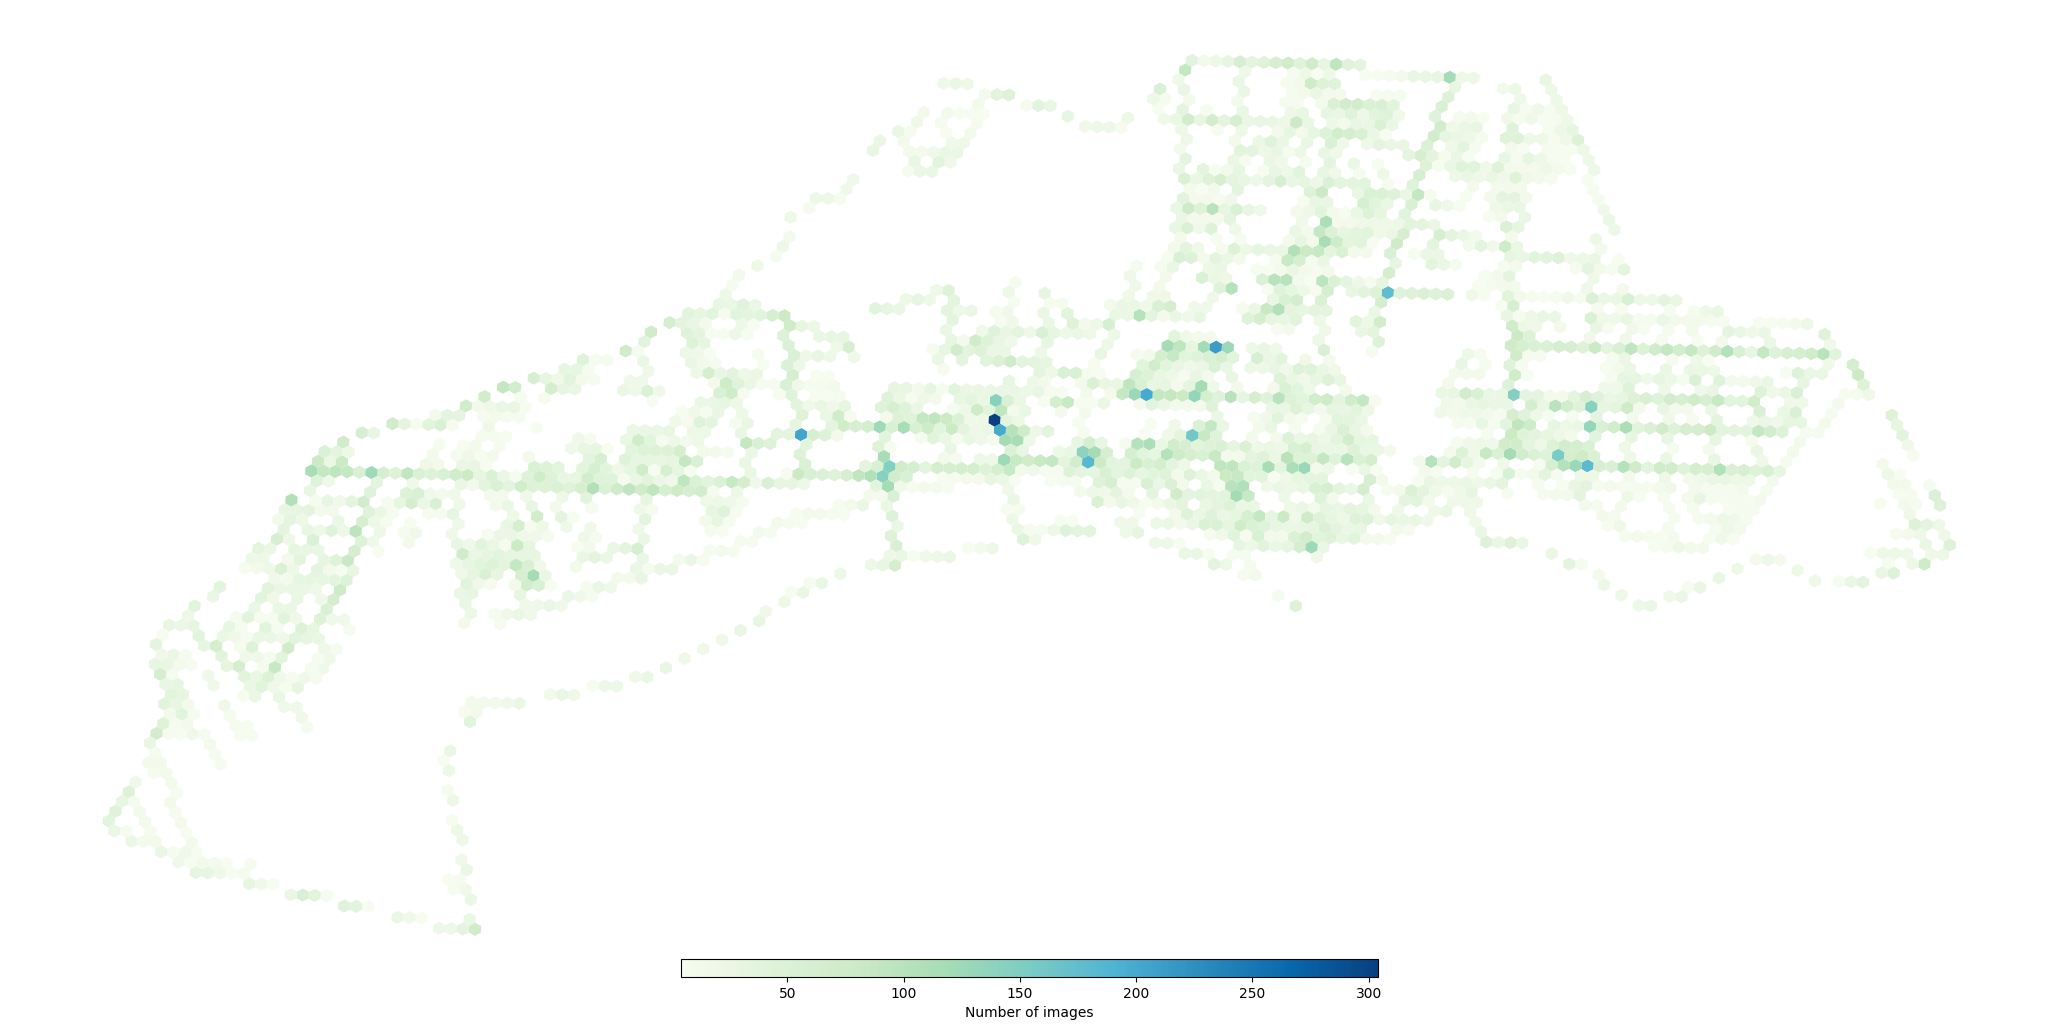

In [66]:
import matplotlib.pyplot as plt


fig, ax = plt.subplots(figsize=(30, 18))

final_gdf.plot(column='sv_counts', ax=ax, cmap='GnBu', legend=True, 
               legend_kwds={'label': "Number of images",
                             'orientation': "horizontal",
                             'shrink': 0.30,
                             'anchor':(0.5, 2.2), 
                             'aspect':40, 
                             'ticks':None,},
            #    missing_kwds={"color": "black",
            #                   "edgecolor": "black",
            #                   "hatch": "//////",
            #                   "alpha":0.2,
            #                   "label": "Missing values",
            #                   }
                )

ax.set_axis_off()

# ax.set_title('Number of images - StreetView', fontsize=12, loc='left', pad=0)
# fig.suptitle('Number of images', fontsize=22, x=0.271, y = 0.94, horizontalalignment='left')
# plt.savefig(r'E:\work\spatio_evo_urbanvisenv_svi\fig\fig_5.png')
# plt.show()
